In [34]:
### Importing  all Basic Commands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline
from glob import glob

In [35]:
# df1 is a data frame which contain columns of High School of WECDSB
df1 =  pd.read_csv("/content/ES_Clients_DeviceDownload_in_Percent.csv")

In [36]:
df1

,School_ID,Date,Clients,Download_mbps,Total_mbps,Utilized_in_Percent
0,113_ES,2022-09-01,114,1.603714,1.906857,6.533486
1,137_ES,2022-09-01,149,1.995857,2.344571,6.533486
2,208_ES,2022-09-01,139,1.282714,1.473571,6.533486
3,227_ES,2022-09-01,141,1.908429,2.171143,6.533486
4,113_ES,2022-09-02,99,1.100000,1.318333,6.533486
...,...,...,...,...,...,...
715,227_ES,2023-02-26,90,1.608333,1.638000,4.152778
716,113_ES,2023-02-27,504,19.562000,19.619000,6.430556
717,137_ES,2023-02-27,769,29.465167,29.589333,8.097222
718,208_ES,2023-02-27,384,8.989833,9.041500,12.750000


In [37]:
# df1 is a data frame which contain weather data of windsor
df2 = pd.read_csv("/content/Weather_Data2_sep_to_feb.csv")


In [38]:
df2

,Longitude (x),Latitude (y),Station Name,Climate ID,Date,Temp (°C),Rel Hum (%),Weather
0,-82.96,42.28,WINDSOR A,6139530,2022-09-01,18.9,75.0,Normal
1,-82.96,42.28,WINDSOR A,6139530,2022-09-01,18.0,80.0,Normal
2,-82.96,42.28,WINDSOR A,6139530,2022-09-01,17.8,81.0,Normal
3,-82.96,42.28,WINDSOR A,6139530,2022-09-01,18.6,78.0,Normal
4,-82.96,42.28,WINDSOR A,6139530,2022-09-01,16.7,86.0,Normal
...,...,...,...,...,...,...,...,...
4339,-82.96,42.28,WINDSOR A,6139530,2023-02-28,3.7,82.0,Normal
4340,-82.96,42.28,WINDSOR A,6139530,2023-02-28,2.3,88.0,Normal
4341,-82.96,42.28,WINDSOR A,6139530,2023-02-28,2.4,87.0,Normal
4342,-82.96,42.28,WINDSOR A,6139530,2023-02-28,2.4,87.0,Normal


In [39]:
# converting date into date column in df2
df2['Date'] = pd.to_datetime(df2['Date'])

In [40]:
# converting date into date column in df1
df1['Date'] = pd.to_datetime(df1['Date'])


In [41]:
# drop columns from weather data which is not required for our analysis
df2 = df2.drop(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID','Weather'], axis=1)

In [42]:
# drop column fron df1
df1 = df1.drop(['School_ID', 'Download_mbps', 'Total_mbps'], axis=1)

In [43]:
# Rename columns in df1 
df1 = df1.rename(columns={'# Clients': 'Clients','Utilized_in_Percent': 'Device_utilization_in_percent'})

In [44]:
# group data by 'group' column and calculate mean of 'value'
df2 = df2.groupby('Date').mean()
df2

,Temp (°C),Rel Hum (%)
Date,,
2022-09-01,21.195833,66.083333
2022-09-02,22.095833,75.125000
2022-09-03,23.933333,76.958333
2022-09-04,20.083333,90.041667
2022-09-05,20.170833,86.791667
...,...,...
2023-02-24,-3.129167,60.500000
2023-02-25,-1.895833,79.125000
2023-02-26,3.037500,59.291667


In [45]:
# group data by 'group' column and calculate mean of 'value'
df1 = df1.groupby('Date').mean()
df1

,Clients,Device_utilization_in_percent
Date,,
2022-09-01,135.75,6.533486
2022-09-02,118.50,6.533486
2022-09-03,55.25,6.533487
2022-09-04,55.50,6.533483
2022-09-05,74.00,6.533475
...,...,...
2023-02-23,412.75,7.478051
2023-02-24,504.00,7.923611
2023-02-25,127.50,5.222222


In [46]:
df2 = df2.round(1)
df2

,Temp (°C),Rel Hum (%)
Date,,
2022-09-01,21.2,66.1
2022-09-02,22.1,75.1
2022-09-03,23.9,77.0
2022-09-04,20.1,90.0
2022-09-05,20.2,86.8
...,...,...
2023-02-24,-3.1,60.5
2023-02-25,-1.9,79.1
2023-02-26,3.0,59.3


In [47]:
df1= df1.round(1)

df1.head(10)

,Clients,Device_utilization_in_percent
Date,,
2022-09-01,135.8,6.5
2022-09-02,118.5,6.5
2022-09-03,55.2,6.5
2022-09-04,55.5,6.5
2022-09-05,74.0,6.5
2022-09-06,238.5,6.5
2022-09-07,336.5,6.5
2022-09-08,343.2,6.5
2022-09-09,367.8,6.5


In [48]:
# Merge the two DataFrames on the 'ID' column
df = pd.merge(df1, df2, on='Date')
df

,Clients,Device_utilization_in_percent,Temp (°C),Rel Hum (%)
Date,,,,
2022-09-01,135.8,6.5,21.2,66.1
2022-09-02,118.5,6.5,22.1,75.1
2022-09-03,55.2,6.5,23.9,77.0
2022-09-04,55.5,6.5,20.1,90.0
2022-09-05,74.0,6.5,20.2,86.8
...,...,...,...,...
2023-02-23,412.8,7.5,1.2,90.3
2023-02-24,504.0,7.9,-3.1,60.5
2023-02-25,127.5,5.2,-1.9,79.1


In [49]:
# cheacking null values in data 
df.isnull().sum()

Clients                          0
Device_utilization_in_percent    0
Temp (°C)                        0
Rel Hum (%)                      0
dtype: int64

In [50]:
# divide data into X and Y
X = df.drop(columns ='Device_utilization_in_percent')
y = df['Device_utilization_in_percent']

In [51]:
# now importing train test split for the splitting of data
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 0)

# Now its time to build model for High Schools of WECDSB

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
# Checking the intercept of model
c =model.intercept_
c

4.362618315452878

In [54]:
# Checking the coficent of model
m = model.coef_
m

array([ 0.00663257, -0.00182816,  0.00899674])

In [55]:
y_pred_train = model.predict(x_train)

In [56]:
y_pred_train

array([7.9179078 , 8.01014047, 6.38730405, 8.3237584 , 8.050498  ,
       5.75631993, 8.21943842, 8.17977912, 5.83885864, 8.10581049,
       5.73769989, 5.80634154, 8.15546989, 8.25540428, 8.40478407,
       8.21892606, 5.37779243, 5.9372627 , 8.22787732, 8.23420663,
       8.00471053, 5.42800184, 5.76826914, 5.77651117, 8.35858461,
       8.70404678, 7.94460076, 8.50334824, 5.79949932, 5.96376941,
       8.69430882, 7.79200025, 5.92338698, 5.98564555, 6.54786775,
       6.09812416, 5.8933082 , 7.84158219, 7.88779816, 7.72093425,
       8.17966916, 7.823931  , 5.70398651, 5.42028729, 8.46519983,
       8.11130933, 8.11678888, 6.51528703, 5.70072533, 5.88331702,
       8.33711858, 5.50368686, 5.68522269, 8.14913351, 7.20247647,
       7.64937471, 8.28726523, 8.39104243, 8.72758282, 7.83250143,
       8.52220428, 8.32252317, 7.95346853, 5.81924917, 8.22504596,
       8.06647031, 8.03369298, 7.52050312, 5.83683875, 8.37517802,
       7.84546422, 8.159821  , 8.10171376, 7.91075567, 5.68665

Text(0, 0.5, 'predicted Devices_utilization_in_percent')

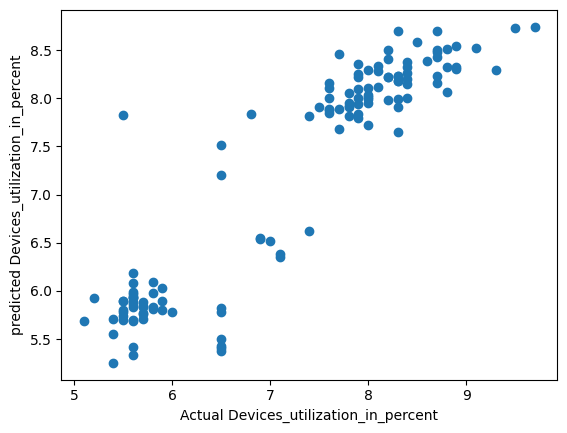

In [57]:
# plot the graph 
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Devices_utilization_in_percent")
plt.ylabel("predicted Devices_utilization_in_percent")

# Evaluate the model

In [58]:
from sklearn.metrics import r2_score

r2_score(y_train,y_pred_train)

0.8556234199936222

In [59]:
y_pred_test= model.predict(x_test)

Text(0, 0.5, 'predicted Devices_utilization_in_percent')

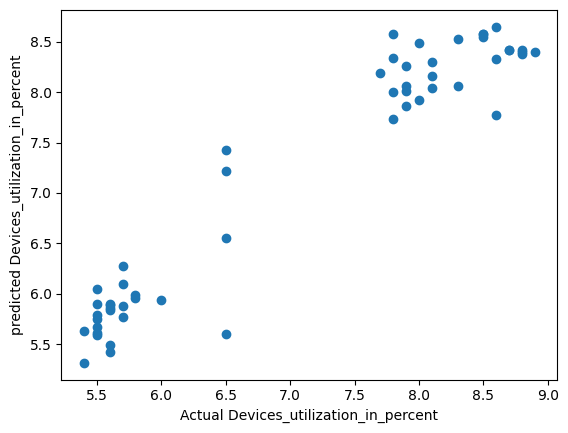

In [60]:
# now checking the model accuracy with test data

plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Devices_utilization_in_percent")
plt.ylabel("predicted Devices_utilization_in_percent")

Evaluate the test data in predict model

In [61]:
r2_score(y_test,y_pred_test)

0.9221330984531312

In [62]:
# Calculate MSE, R2 score, and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the results
print("MSE:", mse)
print("R2 score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 0.1340680587281506
R2 score: 0.9221330984531312
MAE: 0.28633249090019686
RMSE: 0.36615305369223755


In [63]:
model.predict([[2000,-2,50.1]])

array([18.08215321])

In [66]:
from joblib import dump
dump(model, 'model_ES.joblib')

['model_ES.joblib']